In [ ]:
import pandas as pd
import numpy as np
from copy import deepcopy

import matplotlib.pyplot as plt

from scipy import optimize

In [ ]:
# Fit functions
def logistic_cdf(x, mu, s, upper_limit_y=2., lower_limit_y=1.):
    """From: https://en.wikipedia.org/wiki/Logistic_distribution"""
    # Factor recalculation
    scale_y = upper_limit_y - lower_limit_y
    shift_y = lower_limit_y
    # Apply x changes
    x = np.log10(x)
    # Calculate CDF
    cdf = 1 + np.exp(-(x-mu)/s)
    cdf = 1/cdf
    # Apply y changes
    y = cdf * scale_y + shift_y
    return y

In [ ]:
# Scipy Fit
def fit_f(x_data,y_data, func=logistic_cdf):
  popt, pconv = optimize.curve_fit(logistic_cdf, x_data, y_data)
  perr = np.sqrt(np.diag(pconv))
  print(popt)
  print(perr)
  return popt, perr

In [ ]:
# original LeNet
accuracies = [{"noise_type": 1, "gauss_std": 0.01, "acc": 0.6395, "epochs": 30}, {"noise_type": 1, "gauss_std": 0.03, "acc": 0.6216, "epochs": 30}, {"noise_type": 1, "gauss_std": 0.04, "acc": 0.6011, "epochs": 30}, {"noise_type": 1, "gauss_std": 0.06, "acc": 0.6076, "epochs": 30}, {"noise_type": 1, "gauss_std": 0.075, "acc": 0.5972, "epochs": 30}, {"noise_type": 1, "gauss_std": 0.09, "acc": 0.5816, "epochs": 30}, {"noise_type": 1, "gauss_std": 0.1, "acc": 0.5984, "epochs": 30}, {"noise_type": 1, "gauss_std": 0.15, "acc": 0.5725, "epochs": 30}, {"noise_type": 1, "gauss_std": 0.2, "acc": 0.4802, "epochs": 30}, {"noise_type": 1, "gauss_std": 0.4, "acc": 0.4827, "epochs": 30}, {"noise_type": 1, "gauss_std": 0.6, "acc": 0.4525, "epochs": 30}, {"noise_type": 1, "gauss_std": 0.7, "acc": 0.4927, "epochs": 30}, {"noise_type": 1, "gauss_std": 0.8, "acc": 0.4222, "epochs": 30}, {"noise_type": 1, "gauss_std": 1.0, "acc": 0.4266, "epochs": 30}, {"noise_type": 1, "gauss_std": 5.0, "acc": 0.1075, "epochs": 30}, {"noise_type": 1, "gauss_std": 10.0, "acc": 0.1052, "epochs": 30}, {"noise_type": 1, "gauss_std": 30.0, "acc": 0.1053, "epochs": 30}, {"noise_type": 1, "gauss_std": 60.0, "acc": 0.1062, "epochs": 30}, {"noise_type": 1, "gauss_std": 90, "acc": 0.1067, "epochs": 30}, {"noise_type": 1, "gauss_std": 100.0, "acc": 0.1064, "epochs": 30}]

df = pd.DataFrame(accuracies)
x_data = np.array(df["gauss_std"])
y_data = np.array(df["acc"])
print(x_data)
print(y_data)

[1.0e-02 3.0e-02 4.0e-02 6.0e-02 7.5e-02 9.0e-02 1.0e-01 1.5e-01 2.0e-01
 4.0e-01 6.0e-01 7.0e-01 8.0e-01 1.0e+00 5.0e+00 1.0e+01 3.0e+01 6.0e+01
 9.0e+01 1.0e+02]
[0.6395 0.6216 0.6011 0.6076 0.5972 0.5816 0.5984 0.5725 0.4802 0.4827
 0.4525 0.4927 0.4222 0.4266 0.1075 0.1052 0.1053 0.1062 0.1067 0.1064]


In [ ]:
popt, perr = fit_f(x_data,y_data)
fit_x = np.logspace(np.log10(x_data.min()), np.log10(x_data.max()), 20)
fit_y = logistic_cdf(fit_x, *popt)

[0.09710798 0.31972677 0.09198362 0.60457695]
[0.06473894 0.06526833 0.01780181 0.01519288]


Midpoint noise: 1.251 (± 6.7 %)


Text(0, 0.5, 'Validation accuracy [%]')

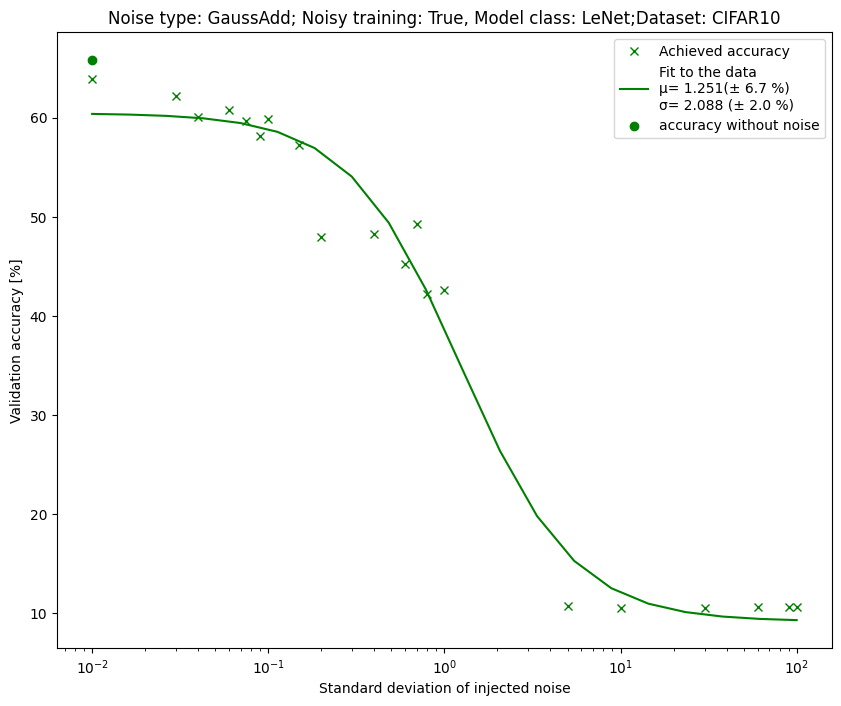

In [ ]:
# Plotting
plt.figure(figsize=(10, 8))
label_popt = 10 ** deepcopy(popt)
label_perr_rel = np.abs(10 * perr / popt)
print(f'Midpoint noise: {label_popt[0]:.3f} (± {label_perr_rel[0]:.1f} %)')

label = f'Fit to the data' + f'\nµ= {label_popt[0]:.3f}(± {label_perr_rel[0]:.1f} %)' + f'\nσ= {label_popt[1]:.3f} (± {label_perr_rel[1]:.1f} %)'
title = f"Noise type: GaussAdd; Noisy training: True, Model class: LeNet;Dataset: CIFAR10"

ax = plt.gca()
ax.set_xscale('log')
plt.scatter([0.01],[0.6581*100],c='g',label='accuracy without noise')
plt.errorbar(x_data, y_data*100,fmt='x',color='g',label=f"Achieved accuracy")
plt.plot(fit_x, fit_y*100, label=label,c='g')

handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1])

plt.title(title)
plt.xlabel('Standard deviation of injected noise')
plt.ylabel('Validation accuracy [%]')

In [ ]:
# @title adversarial attack

In [ ]:
# adversarial attack
accuracies_adversarial = [{"noise_type": 1, "gauss_std": 0.01, "acc": 0.5705, "acc_adv": 0.4618, "epochs": 30}, {"noise_type": 1, "gauss_std": 0.03, "acc": 0.5989, "acc_adv": 0.4906, "epochs": 30}, {"noise_type": 1, "gauss_std": 0.04, "acc": 0.562, "acc_adv": 0.4621, "epochs": 30},{"noise_type": 1, "gauss_std": 0.06, "acc": 0.5779, "acc_adv": 0.4762, "epochs": 30}, {"noise_type": 1, "gauss_std": 0.075, "acc": 0.5744, "acc_adv": 0.4727, "epochs": 30}, {"noise_type": 1, "gauss_std": 0.09, "acc": 0.5793, "acc_adv": 0.4747, "epochs": 30}, {"noise_type": 1, "gauss_std": 0.1, "acc": 0.5557, "acc_adv": 0.461, "epochs": 30}, {"noise_type": 1, "gauss_std": 0.15, "acc": 0.5383, "acc_adv": 0.4547, "epochs": 30}, {"noise_type": 1, "gauss_std": 0.2, "acc": 0.5287, "acc_adv": 0.4443, "epochs": 30}, {"noise_type": 1, "gauss_std": 0.4, "acc": 0.462, "acc_adv": 0.3975, "epochs": 30}, {"noise_type": 1, "gauss_std": 0.6, "acc": 0.3995, "acc_adv": 0.3472, "epochs": 30}, {"noise_type": 1, "gauss_std": 0.7, "acc": 0.4057, "acc_adv": 0.3573, "epochs": 30}, {"noise_type": 1, "gauss_std": 0.8, "acc": 0.3688, "acc_adv": 0.3243, "epochs": 30}, {"noise_type": 1, "gauss_std": 1.0, "acc": 0.107, "acc_adv": 0.1058, "epochs": 30}, {"noise_type": 1, "gauss_std": 5.0, "acc": 0.107, "acc_adv": 0.1091, "epochs": 30}, {"noise_type": 1, "gauss_std": 10.0, "acc": 0.107, "acc_adv": 0.1047, "epochs": 30}, {"noise_type": 1, "gauss_std": 30.0, "acc": 0.1075, "acc_adv": 0.1074, "epochs": 30}, {"noise_type": 1, "gauss_std": 60.0, "acc": 0.1083, "acc_adv": 0.1051, "epochs": 30},{"noise_type": 1, "gauss_std": 90, "acc": 0.1056, "acc_adv": 0.1064, "epochs": 30}, {"noise_type": 1, "gauss_std": 100.0, "acc": 0.1049, "acc_adv": 0.1041, "epochs": 30}]

df__adversarial = pd.DataFrame(accuracies_adversarial)
x_data_adversarial = np.array(df__adversarial["gauss_std"])
y_data_adversarial = np.array(df__adversarial["acc"])
print(x_data_adversarial)
print(y_data_adversarial)

[1.0e-02 3.0e-02 4.0e-02 6.0e-02 7.5e-02 9.0e-02 1.0e-01 1.5e-01 2.0e-01
 4.0e-01 6.0e-01 7.0e-01 8.0e-01 1.0e+00 5.0e+00 1.0e+01 3.0e+01 6.0e+01
 9.0e+01 1.0e+02]
[0.5705 0.5989 0.562  0.5779 0.5744 0.5793 0.5557 0.5383 0.5287 0.462
 0.3995 0.4057 0.3688 0.107  0.107  0.107  0.1075 0.1083 0.1056 0.1049]


In [ ]:
popt1, perr1 = fit_f(x_data_adversarial,y_data_adversarial)
fit_x1 = np.logspace(np.log10(x_data_adversarial.min()), np.log10(x_data_adversarial.max()), 20)
fit_y1 = logistic_cdf(fit_x1, *popt1)

[-0.12391962  0.0959493   0.10165539  0.55832853]
[0.02217607 0.02555812 0.0164134  0.01324146]


Midpoint noise: 0.752 (± 1.8 %)


Text(0, 0.5, 'Validation accuracy [%]')

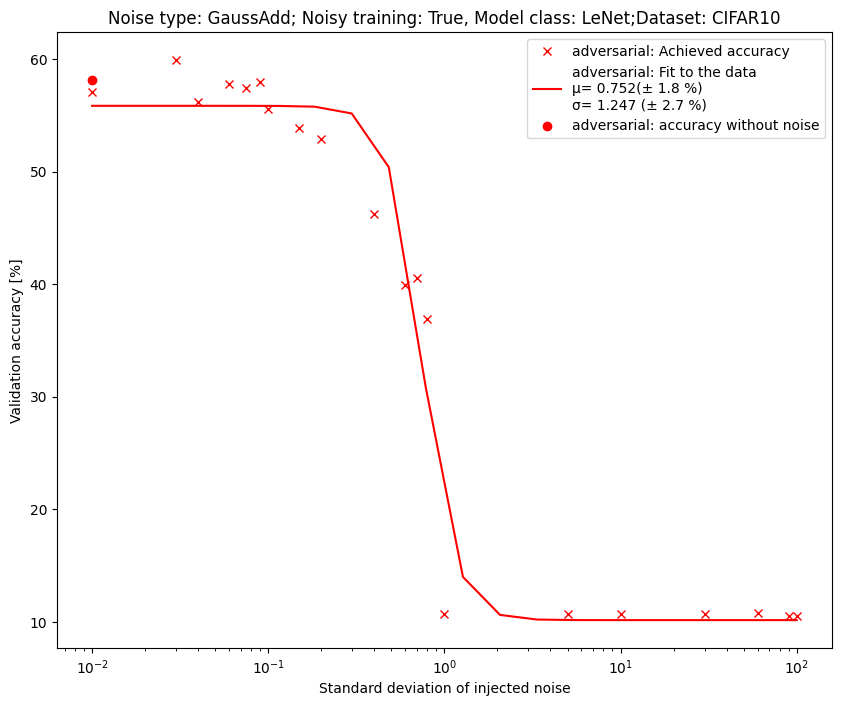

In [ ]:
# Plotting
plt.figure(figsize=(10, 8))
label_popt1 = 10 ** deepcopy(popt1)
label_perr_rel1 = np.abs(10 * perr1 / popt1)
print(f'Midpoint noise: {label_popt1[0]:.3f} (± {label_perr_rel1[0]:.1f} %)')

label1 = f'adversarial: Fit to the data' + f'\nµ= {label_popt1[0]:.3f}(± {label_perr_rel1[0]:.1f} %)' + f'\nσ= {label_popt1[1]:.3f} (± {label_perr_rel1[1]:.1f} %)'
title1 = f"Noise type: GaussAdd; Noisy training: True, Model class: LeNet;Dataset: CIFAR10"

ax = plt.gca()
ax.set_xscale('log')

plt.scatter([0.01],[0.5816*100],c='r',label='adversarial: accuracy without noise')
plt.errorbar(x_data_adversarial, y_data_adversarial*100,fmt='x',color='r',label=f"adversarial: Achieved accuracy")
plt.plot(fit_x1, fit_y1*100, label=label1,c='r')

handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1])

plt.title(title1)
plt.xlabel('Standard deviation of injected noise')
plt.ylabel('Validation accuracy [%]')


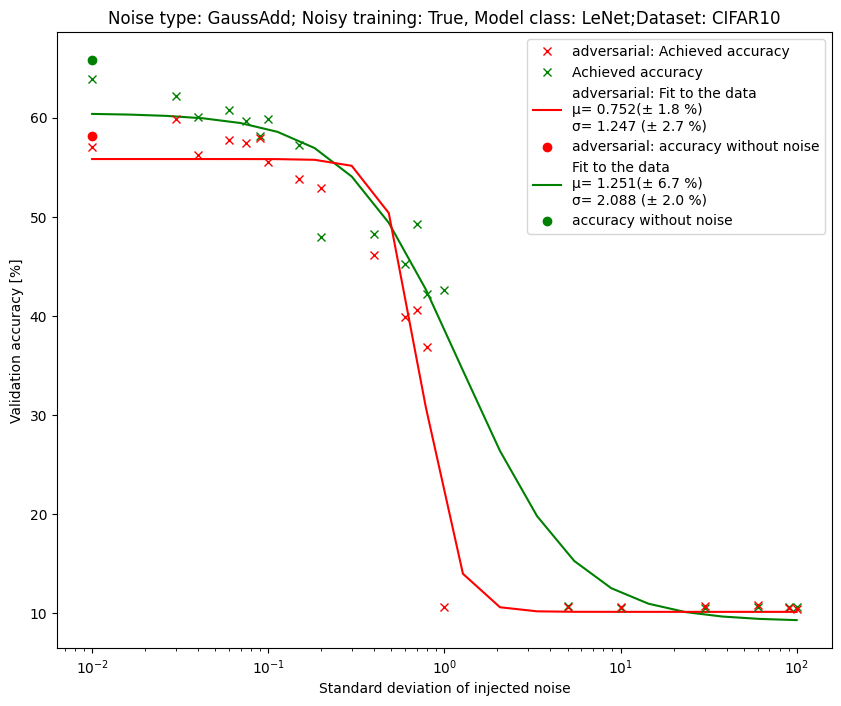

In [ ]:
# Plotting
plt.figure(figsize=(10, 8))
ax = plt.gca()
ax.set_xscale('log')

plt.scatter([0.01],[0.6581*100],c='g',label='accuracy without noise')
plt.errorbar(x_data, y_data*100,fmt='x',color='g',label=f"Achieved accuracy")
plt.plot(fit_x, fit_y*100, label=label,c='g')

plt.scatter([0.01],[0.5816*100],c='r',label='adversarial: accuracy without noise')
plt.errorbar(x_data_adversarial, y_data_adversarial*100,fmt='x',color='r',label=f"adversarial: Achieved accuracy")
plt.plot(fit_x1, fit_y1*100, label=label1,c='r')

handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1])

plt.title(title)
plt.xlabel('Standard deviation of injected noise')
plt.ylabel('Validation accuracy [%]')

plt.savefig('combined.png', dpi=300, bbox_inches='tight')